# **Universidad Galileo**

## **Ciencia de Datos en Python**

### **César Luis Polanco, 20062088**

## **Introducción del proyecto final de curso**

El proyecto consiste en aplicar los conocimientos aprendidos en clase (y apoyándose de referencias adicionales útiles) para crear **modelos predictivos de regresión lineal uni-variable** sencillos de la forma: $$y = f(x) =  mx +b$$ 

Donde:
- y = la variable dependiente
- x = variable independiente
- m = pendiente de la recta(parámetro del modelo)
- b = intercepto(parámetro del modelo)



In [51]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
url = "./proyecto_training_data.npy"
datos = np.load(url) 
print(datos[1-5:])

[[2.10000e+05 6.00000e+00 2.07300e+03 7.00000e+00 1.97800e+03 8.50000e+01]
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


### **Explicación de datos (texto literal de archivo)**

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **OverallQual**: Overall material and finish quality, rates the overall material and finish of the house
    - 10 -> Very Excellent
    - 9 -> Excellent
    - 8 -> Very Good
    - 7 -> Good
    - 6 -> Above Average
    - 5 -> Average
    - 4 -> Below Average
    - 3 -> Fair
    - 2 -> Poor
    - 1 -> Very Poor
- **1stFlrSF**: First Floor square feet
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **YearBuilt**: Original construction date
- **LotFrontage**: Linear feet of street connected to property

In [53]:
encabezados = list(["PrecioVenta","CalidadMaterial","PiesCuadradosPisoUno","TotalHabitaciones","AñoConstruccion","PiesLinealesDePropiedad"])
df = pd.DataFrame(datos, columns=encabezados)
df.head()

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   float64
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   float64
 4   AñoConstruccion          1460 non-null   float64
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


## **Verificación de datos**

In [55]:
df.shape

(1460, 6)

In [56]:
## Verificación de nan values
df[df.isna().any(axis=1)]

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
12,144000.0,5.0,912.0,4.0,1962.0,NaN
14,157000.0,6.0,1253.0,5.0,1960.0,NaN
16,149000.0,6.0,1004.0,5.0,1970.0,NaN
24,154000.0,5.0,1060.0,6.0,1968.0,NaN
...,...,...,...,...,...,...
1429,182900.0,6.0,1440.0,7.0,1981.0,NaN
1431,143750.0,6.0,958.0,5.0,1976.0,NaN
1441,149300.0,6.0,848.0,3.0,2004.0,NaN
1443,121000.0,6.0,952.0,4.0,1916.0,NaN


In [57]:
##Remplazar valores NaN
df["PiesLinealesDePropiedad"] = df["PiesLinealesDePropiedad"].fillna(value=df.mean())
df["PiesCuadradosPisoUno"] = df["PiesCuadradosPisoUno"].fillna(value=df.mean())

In [58]:
##Rectificar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   float64
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   float64
 4   AñoConstruccion          1460 non-null   float64
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [59]:
#Cambio de presentación de datos

df["CalidadMaterial"] = df["CalidadMaterial"].astype(int)
df["TotalHabitaciones"] = df["TotalHabitaciones"].astype(int)
df["AñoConstruccion"] = df["AñoConstruccion"].astype(int)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1460 non-null   float64
 1   CalidadMaterial          1460 non-null   int32  
 2   PiesCuadradosPisoUno     1460 non-null   float64
 3   TotalHabitaciones        1460 non-null   int32  
 4   AñoConstruccion          1460 non-null   int32  
 5   PiesLinealesDePropiedad  1201 non-null   float64
dtypes: float64(3), int32(3)
memory usage: 51.5 KB


In [61]:
#Visualización inicial
df

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
0,208500.0,7,856.0,8,2003,65.0
1,181500.0,6,1262.0,6,1976,80.0
2,223500.0,7,920.0,6,2001,68.0
3,140000.0,7,961.0,7,1915,60.0
4,250000.0,8,1145.0,9,2000,84.0
...,...,...,...,...,...,...
1455,175000.0,6,953.0,7,1999,62.0
1456,210000.0,6,2073.0,7,1978,85.0
1457,266500.0,7,1188.0,9,1941,66.0
1458,142125.0,5,1078.0,5,1950,68.0


In [62]:
#Trains Test Split by loc
rows, cols = df.shape
df_train = df.loc[:int(rows*0.8),]
df_test = df.loc[int(rows*0.8)+1:,]

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              1169 non-null   float64
 1   CalidadMaterial          1169 non-null   int32  
 2   PiesCuadradosPisoUno     1169 non-null   float64
 3   TotalHabitaciones        1169 non-null   int32  
 4   AñoConstruccion          1169 non-null   int32  
 5   PiesLinealesDePropiedad  963 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 41.2 KB


In [64]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 1169 to 1459
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PrecioVenta              291 non-null    float64
 1   CalidadMaterial          291 non-null    int32  
 2   PiesCuadradosPisoUno     291 non-null    float64
 3   TotalHabitaciones        291 non-null    int32  
 4   AñoConstruccion          291 non-null    int32  
 5   PiesLinealesDePropiedad  238 non-null    float64
dtypes: float64(3), int32(3)
memory usage: 10.4 KB


## **Exploración de datos**

Para cada variable en el dataset calcular((usando numpy o pandas):
   - media
   - valor máximo
   - valor mínimo 
   - rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
   - desviación estándar 

In [65]:
#Se consigue todos excepto el rango
round(df_train.describe(),4)

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,963.0000
mean,180636.8212,6.1009,1156.3918,6.4859,1971.4200,69.9990
std,78798.0219,1.3774,373.6276,1.6085,29.9579,23.5213
min,34900.0000,1.0000,334.0000,2.0000,1875.0000,21.0000
25%,129900.0000,5.0000,882.0000,5.0000,1954.0000,59.0000
50%,163000.0000,6.0000,1086.0000,6.0000,1973.0000,70.0000
75%,214000.0000,7.0000,1390.0000,7.0000,2000.0000,80.0000
max,755000.0000,10.0000,3228.0000,14.0000,2010.0000,313.0000


In [66]:
#work around para obtener el rango, crear un frame con los valores de describe
df_train_range = round(df_train.describe(),4)
df_train_range


,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,963.0000
mean,180636.8212,6.1009,1156.3918,6.4859,1971.4200,69.9990
std,78798.0219,1.3774,373.6276,1.6085,29.9579,23.5213
min,34900.0000,1.0000,334.0000,2.0000,1875.0000,21.0000
25%,129900.0000,5.0000,882.0000,5.0000,1954.0000,59.0000
50%,163000.0000,6.0000,1086.0000,6.0000,1973.0000,70.0000
75%,214000.0000,7.0000,1390.0000,7.0000,2000.0000,80.0000
max,755000.0000,10.0000,3228.0000,14.0000,2010.0000,313.0000


In [67]:
##Calcular el rango buscando el valor máximo y mínimo (agregar al dataframe)
round(df_train_range.describe().append(pd.Series(df_train_range.loc['max'] - df_train_range.loc['min'], name = "range")), 4)

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
count,8.0000,8.0000,8.0000,8.0000,8.0000,8.0000
mean,194675.4804,150.6848,1202.3774,151.3868,1622.7972,199.9400
std,237887.6790,411.4719,902.2724,411.1955,702.3184,322.0925
min,1169.0000,1.0000,334.0000,1.6085,29.9579,21.0000
25%,67823.5164,4.0944,754.9069,4.2500,1698.5000,50.1303
50%,146450.0000,6.0504,1121.1959,6.2430,1962.7100,69.9995
75%,188977.6159,7.7500,1224.2500,8.7500,1979.7500,138.2500
max,755000.0000,1169.0000,3228.0000,1169.0000,2010.0000,963.0000
range,720100.0000,9.0000,2894.0000,12.0000,135.0000,292.0000


### **Histograma de cada variable**

In [68]:
%matplotlib inline

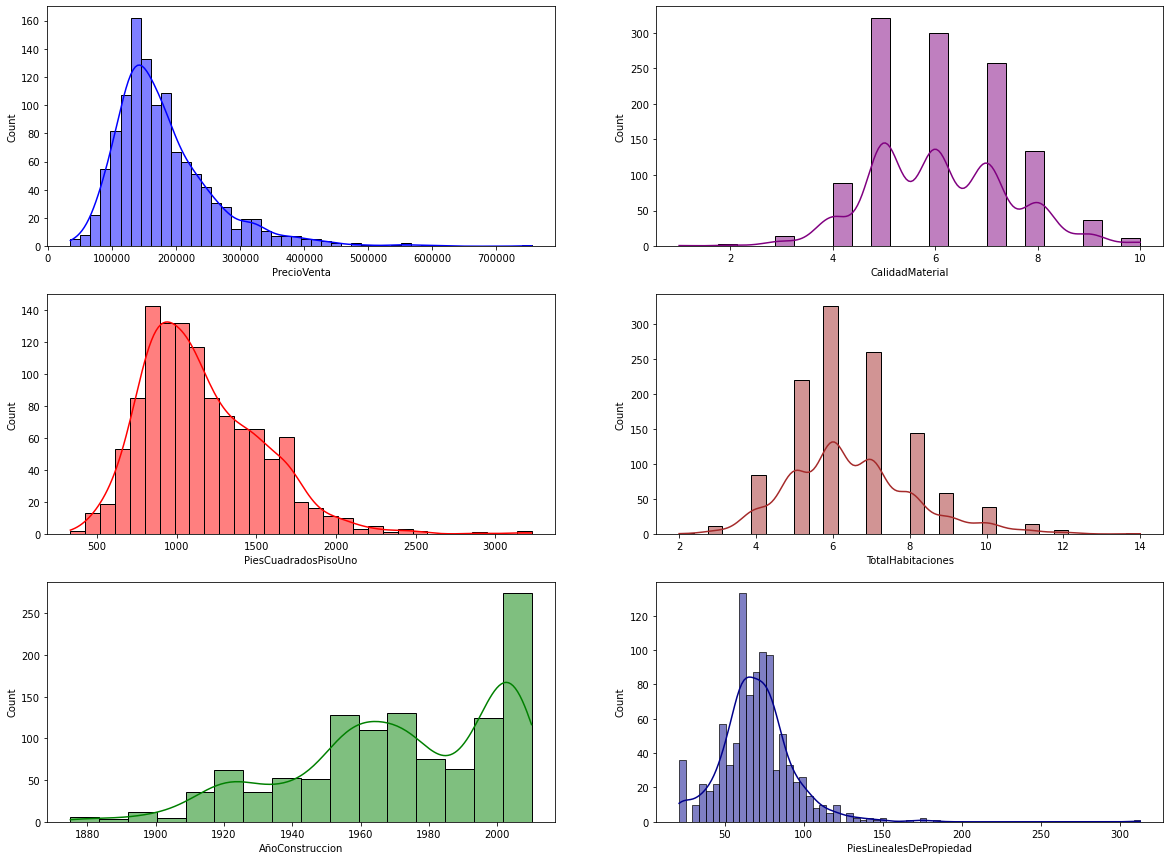

In [69]:
fig  = plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.2, wspace=0.2)
c = ["blue", "purple", "red", "brown", "green", "darkblue"]

for i in range(cols):
  plt.subplot(3, 2, i+1)
  sns.histplot(df_train.iloc[:,i], kde=True, color=c[i])
plt.show()


### **Matriz de correlación**

In [70]:
corr = round(df_train.corr(), 4)
corr

,PrecioVenta,CalidadMaterial,PiesCuadradosPisoUno,TotalHabitaciones,AñoConstruccion,PiesLinealesDePropiedad
PrecioVenta,1.0000,0.7938,0.6163,0.5648,0.5330,0.3638
CalidadMaterial,0.7938,1.0000,0.4694,0.4443,0.5670,0.2417
PiesCuadradosPisoUno,0.6163,0.4694,1.0000,0.4094,0.2917,0.4169
TotalHabitaciones,0.5648,0.4443,0.4094,1.0000,0.1225,0.3409
AñoConstruccion,0.5330,0.5670,0.2917,0.1225,1.0000,0.1186
PiesLinealesDePropiedad,0.3638,0.2417,0.4169,0.3409,0.1186,1.0000


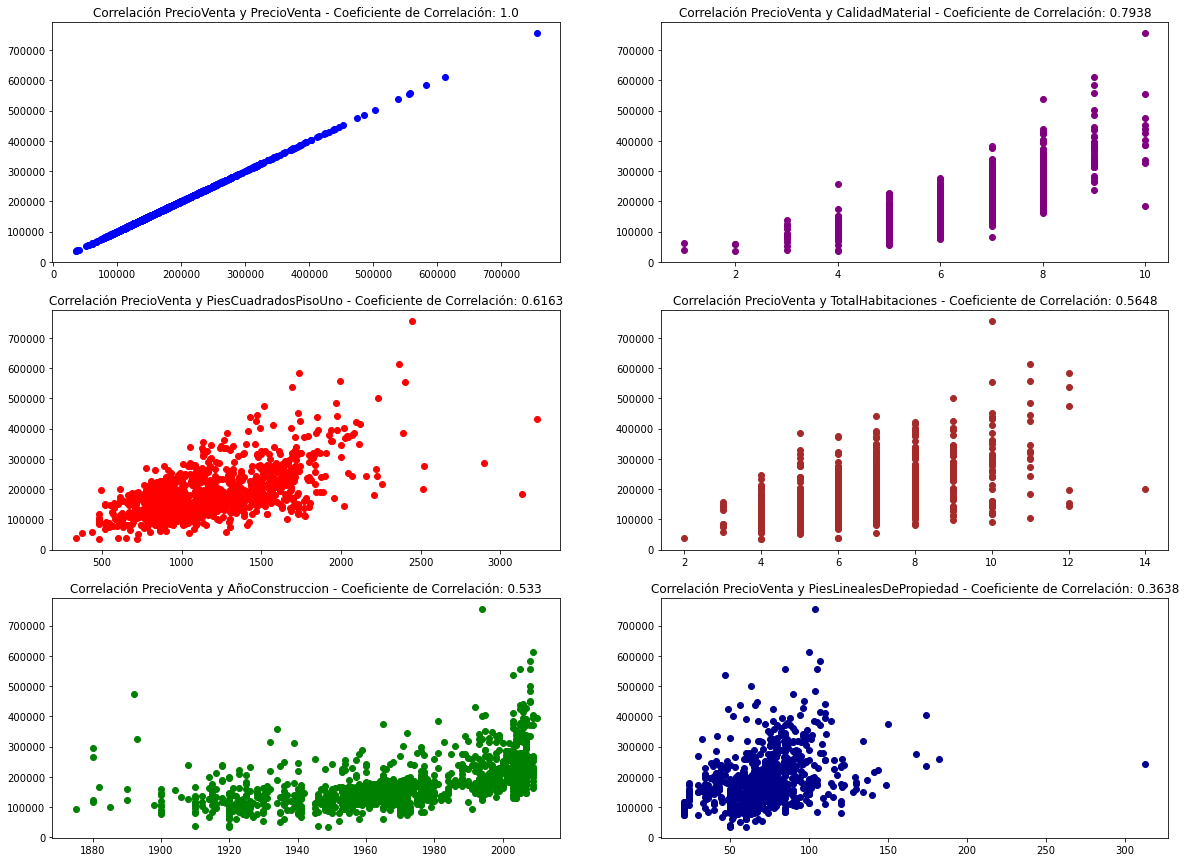

In [71]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.2, wspace=0.2)

#scatter
for i in range(cols):
    plt.subplot(3, 2, i+1)
    plt.scatter(df_train.iloc[:,i], df_train.iloc[:,0], color=c[i])
    plt.title("Correlación PrecioVenta y {} - Coeficiente de Correlación: {}".format(df_train.columns[i], corr.iloc[0,i]))
plt.show()

plt.show()


### **Selección de variables**
- CalidadMateiral con coeficiente de correlación de **0.7938**
- PiesCuadradosPisoUno con coeficiente de correlación de **0.6163**


## **Funciones desarrolladas para proyecto**


In [72]:
#Funcion entrenamiento modelo regresión lineal
def train_simple_linear_regress(x, y, epochs, imprimir_error_cada, lr):
    dict_model = {}
    mb = np.array([0,0])
    error ={}
    xm = np.column_stack((x,np.ones_like(y)))
    for i in range(epochs):
        dict_model[i] = mb
        yhat = np.matmul(xm,mb) #producto punto 
        error[i]=(round((np.mean(np.power(y - yhat, 2)) /2),4)) #cálculo de error}
        gradient = np.matmul((yhat - y),xm) / (yhat - y).shape[0] #calculo de gradiente
        
        mb = [mb[0]-lr * gradient[0],mb[1]-lr * gradient[1]] #actualiza m y b respecto al learning rate
        dict_model[i] = list(mb)
        if i % imprimir_error_cada == 0:
            print("Ciclo No. :", i, "  Error:", error[i])
    return dict_model,error

In [73]:
#Funcion graficar errores por iteraciones
def graph_error_iteration(error):
    plt.plot(list(error.keys()), list(error.values()), color="blue")
    plt.xlabel("Iteración")
    plt.ylabel("Error")
    plt.title("Error por iteración")
    plt.show()

In [74]:
def graph_model_evolution(model,x,y,n):
    
    mb_model = list(model.values()) #obtener los valores mb
    mx = np.array(x).reshape(-1,1) #matrix de X 
    m1 = np.ones_like(mx)
    matrix = np.hstack((mx, m1))
    for i in range(len(model)):
        if i % n == 0:
            mb = mb_model[i]
            yhat = np.matmul(matrix, mb)
            plt.plot(x, yhat, color="green")
            plt.plot(x, y, "ro", ms=5)
            plt.title("Evolución de modelo")
            plt.xlabel("Variable x")
            plt.ylabel("Precio de casa")
            plt.show()
            

## **Pruebas Manuales de proyecto**


### **Prueba Manual Calidad Material**

Ciclo No. : 0   Error: 19416738971.9102
Ciclo No. : 10   Error: 1386287533.7005
Ciclo No. : 20   Error: 1376711445.9457
Ciclo No. : 30   Error: 1368187517.8641
Ciclo No. : 40   Error: 1359980497.9695
Ciclo No. : 50   Error: 1352078577.1486
Ciclo No. : 60   Error: 1344470413.2268
Ciclo No. : 70   Error: 1337145085.6799
Ciclo No. : 80   Error: 1330092079.9588
Ciclo No. : 90   Error: 1323301272.3964
Ciclo No. : 100   Error: 1316762915.6768
Ciclo No. : 110   Error: 1310467624.8444
Ciclo No. : 120   Error: 1304406363.8327
Ciclo No. : 130   Error: 1298570432.4946
Ciclo No. : 140   Error: 1292951454.114
Ciclo No. : 150   Error: 1287541363.3827
Ciclo No. : 160   Error: 1282332394.8232
Ciclo No. : 170   Error: 1277317071.6425
Ciclo No. : 180   Error: 1272488195.0004
Ciclo No. : 190   Error: 1267838833.6762
Ciclo No. : 200   Error: 1263362314.1199
Ciclo No. : 210   Error: 1259052210.8734
Ciclo No. : 220   Error: 1254902337.3474
Ciclo No. : 230   Error: 1250906736.9413
Ciclo No. : 240   Error: 12

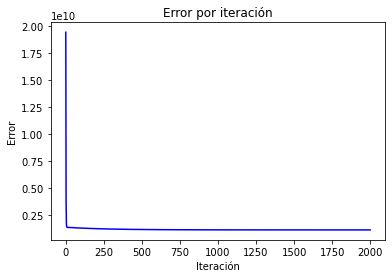

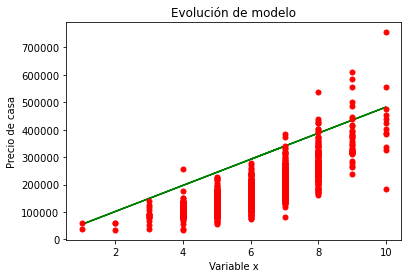

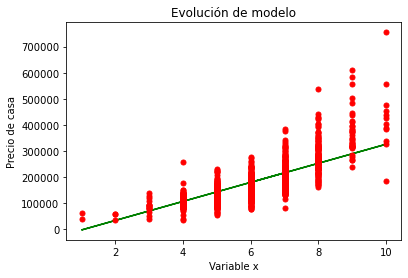

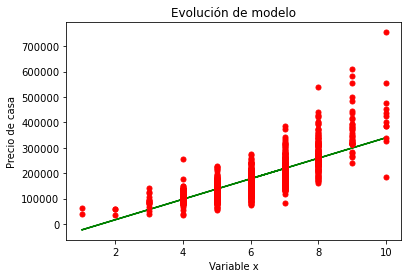

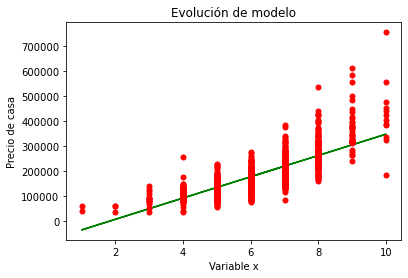

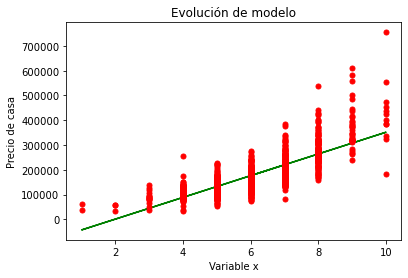

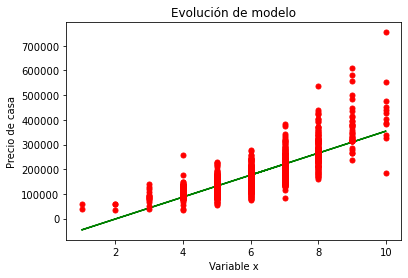

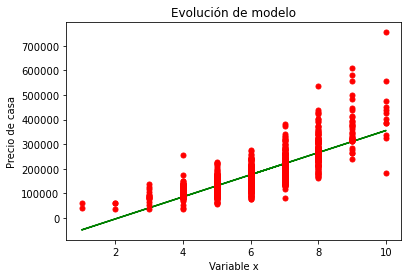

In [75]:
#x = np.array([65,80,68])
#y = np.array([208.5,181.5,223.5])
#model,error = train_simple_linear_regress(x,y, 4,1,0.00001)
model_calidad,error_calidad = train_simple_linear_regress(df_train['CalidadMaterial'],df_train['PrecioVenta'], 2000,10,0.04)
graph_error_iteration(error_calidad)
graph_model_evolution(model_calidad, df_train["CalidadMaterial"], df_train["PrecioVenta"], 300)

### **Prueba Pies cuadrados primer piso**

Ciclo No. : 0   Error: 19416738971.9102
Ciclo No. : 10   Error: 1967282372.2573
Ciclo No. : 20   Error: 1967275877.0486
Ciclo No. : 30   Error: 1967275794.9418
Ciclo No. : 40   Error: 1967275712.8374


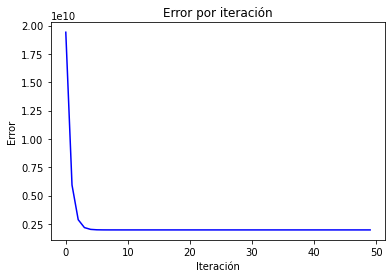

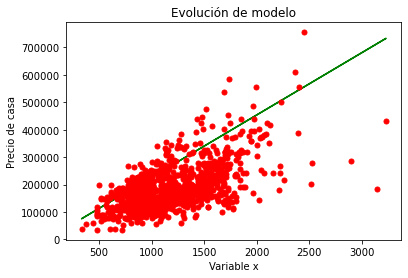

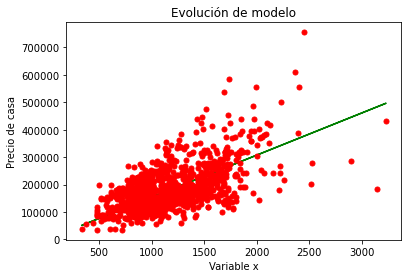

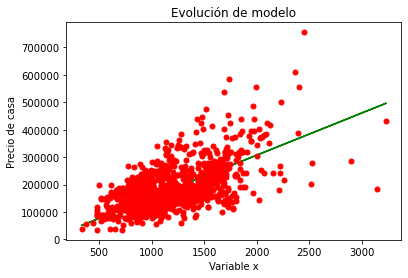

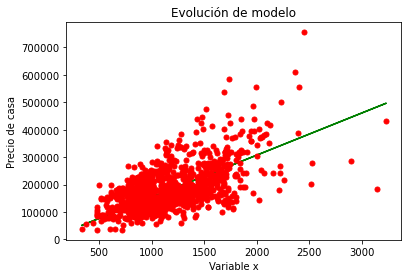

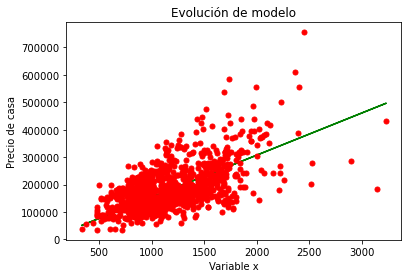

In [76]:
modelFirst,errorFirst = train_simple_linear_regress(df_train['PiesCuadradosPisoUno'],df_train['PrecioVenta'], 50,10,0.000001)
graph_error_iteration(errorFirst)
graph_model_evolution(modelFirst, df_train["PiesCuadradosPisoUno"], df_train["PrecioVenta"], 10)

## **Utilizando Scikit-learn**


In [77]:
# obtener datos de entreamiento para ambas variables con mayor correlación

Precio_train = df_train["PrecioVenta"].to_list()
calidad_train = df_train["CalidadMaterial"].to_list()
PiesCuadrados_train = df_train["PiesCuadradosPisoUno"].to_list()

### **Scikit-learn Entrenar modelos**


In [78]:
Calidad_LR = LinearRegression()
PiesCuadrados_LR = LinearRegression()

#Entrenar modelos
Calidad_LR.fit(np.array(calidad_train).reshape(-1, 1), np.array(Precio_train))
PiesCuadrados_LR.fit(np.array(PiesCuadrados_train).reshape(-1,1), np.array(Precio_train))

LinearRegression()

In [79]:
def predict_models(manual_model,scikit_model,x):
    xm = np.column_stack((x,np.ones_like(x)))
    yhat_manual = np.matmul(xm, manual_model)
    yhat_scikit = scikit_model.predict(x.reshape(-1,1))
    return yhat_manual,yhat_scikit,(yhat_manual+yhat_scikit)/2

In [80]:
def graph_compare_yhat(yhat_manual,yhat_scikit,mean,x):
    plt.plot(x, yhat_manual, color="blue", label="yhat_manual")
    plt.plot(x, yhat_scikit, color="red", label="yhat_scikit")
    plt.plot(x, mean, color="green", label="ymean")
    plt.title("Comparativa yhat manual, yhat scikit, yhat mean")
    plt.legend()
    plt.show()

### **Comparativa Calidad Material de yhat manual, yhat Scikit y yhat promedio**

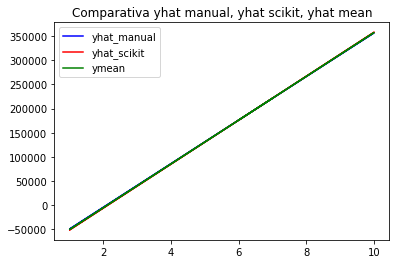

In [91]:
yhat_manual,yhat_sk,y_mean =predict_models(model_calidad[len(model_calidad.keys())-1],Calidad_LR,np.array(calidad_train).reshape(-1,1))
graph_compare_yhat(yhat_manual,yhat_sk,y_mean,df_train["CalidadMaterial"])

### **Comparativa Pies Cuadrado de yhat manual, yhat Scikit y yhat promedio**

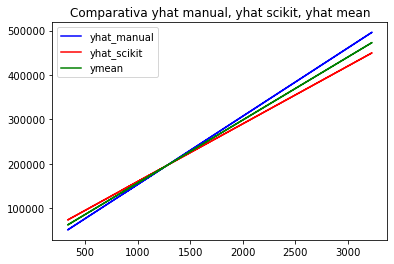

In [82]:
yhat_manual_1,yhat_sk_1,y_mean_1 =predict_models(modelFirst[len(modelFirst.keys())-1],PiesCuadrados_LR,np.array(PiesCuadrados_train).reshape(-1,1))
graph_compare_yhat(yhat_manual_1,yhat_sk_1,y_mean_1,df_train["PiesCuadradosPisoUno"])

## **Validar con el 20% (Dataset Test)**

In [83]:
#obtener datos desde df_test
Precio_test = df_test["PrecioVenta"].to_list()
calidad_test = df_test["CalidadMaterial"].to_list()
PiesCuadrados_test = df_test["PiesCuadradosPisoUno"].to_list()

In [84]:
Calidad_LR_test = LinearRegression()
PiesCuadrados_LR_test = LinearRegression()

#Entrenar modelos
Calidad_LR_test.fit(np.array(calidad_test).reshape(-1, 1), np.array(Precio_test))
PiesCuadrados_LR_test.fit(np.array(PiesCuadrados_test).reshape(-1,1), np.array(Precio_test))

LinearRegression()

### **yhat yhat predicción y errores - Calidad Material**

In [92]:
model_calidad_test,error_calidad_test = train_simple_linear_regress(df_test["CalidadMaterial"],df_test["PrecioVenta"], 1000,10,0.0001)
yhat_manual_test,yhat_sk_test,y_mean_test =predict_models(model_calidad_test[len(model_calidad_test.keys())-1],Calidad_LR_test,np.array(calidad_test).reshape(-1,1))
error_calidad_scikit = mean_squared_error(yhat_manual_test,yhat_sk_test)
error_calidad_test = error_calidad_test[len(error_calidad_test)-1]


Ciclo No. : 0   Error: 19932981335.0722
Ciclo No. : 10   Error: 18516432023.9298
Ciclo No. : 20   Error: 17209123226.6982
Ciclo No. : 30   Error: 16002630457.6513
Ciclo No. : 40   Error: 14889178916.4114
Ciclo No. : 50   Error: 13861593385.063
Ciclo No. : 60   Error: 12913251989.135
Ciclo No. : 70   Error: 12038043524.4766
Ciclo No. : 80   Error: 11230328075.0284
Ciclo No. : 90   Error: 10484900667.6993
Ciclo No. : 100   Error: 9796957730.1326
Ciclo No. : 110   Error: 9162066135.2048
Ciclo No. : 120   Error: 8576134632.7728
Ciclo No. : 130   Error: 8035387484.5667
Ciclo No. : 140   Error: 7536340132.3263
Ciclo No. : 150   Error: 7075776742.3782
Ciclo No. : 160   Error: 6650729481.9465
Ciclo No. : 170   Error: 6258459393.6472
Ciclo No. : 180   Error: 5896438744.9163
Ciclo No. : 190   Error: 5562334738.6273
Ciclo No. : 200   Error: 5253994479.9248
Ciclo No. : 210   Error: 4969431102.3959
Ciclo No. : 220   Error: 4706810964.1733
Ciclo No. : 230   Error: 4464441831.4583
Ciclo No. : 240   E

### **yhat yhat predicción y errores - Pies Cuadrados Nivel 1**

In [86]:
model_first_test,error_first_test = train_simple_linear_regress(df_test['PiesCuadradosPisoUno'],df_test['PrecioVenta'], 400,10,0.000001)
yhat_manual_test_1,yhat_sk_test_1,y_mean_test_1 =predict_models(model_first_test[len(model_first_test.keys())-1],PiesCuadrados_LR_test,np.array(PiesCuadrados_test).reshape(-1,1))
error_first_scikit = mean_squared_error(yhat_manual_test_1,yhat_sk_test_1)
error_first_test = error_first_test[len(error_first_test)-1]

Ciclo No. : 0   Error: 19932981335.0722
Ciclo No. : 10   Error: 2417708453.041
Ciclo No. : 20   Error: 2417093193.9611
Ciclo No. : 30   Error: 2417092780.8093
Ciclo No. : 40   Error: 2417092389.2424
Ciclo No. : 50   Error: 2417091997.6771
Ciclo No. : 60   Error: 2417091606.1128
Ciclo No. : 70   Error: 2417091214.5494
Ciclo No. : 80   Error: 2417090822.9869
Ciclo No. : 90   Error: 2417090431.4253
Ciclo No. : 100   Error: 2417090039.8647
Ciclo No. : 110   Error: 2417089648.305
Ciclo No. : 120   Error: 2417089256.7462
Ciclo No. : 130   Error: 2417088865.1883
Ciclo No. : 140   Error: 2417088473.6313
Ciclo No. : 150   Error: 2417088082.0753
Ciclo No. : 160   Error: 2417087690.5202
Ciclo No. : 170   Error: 2417087298.966
Ciclo No. : 180   Error: 2417086907.4127
Ciclo No. : 190   Error: 2417086515.8604
Ciclo No. : 200   Error: 2417086124.309
Ciclo No. : 210   Error: 2417085732.7585
Ciclo No. : 220   Error: 2417085341.2089
Ciclo No. : 230   Error: 2417084949.6602
Ciclo No. : 240   Error: 24170

### **Comparatavia Calidad Material con (Dataset Test)**

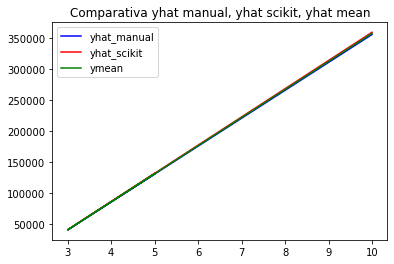

In [87]:
yhat_manual_test,yhat_sk_test,y_mean_test =predict_models(model_calidad[len(model_calidad.keys())-1],Calidad_LR_test,np.array(calidad_test).reshape(-1,1))
graph_compare_yhat(yhat_manual_test,yhat_sk_test,y_mean_test,df_test["CalidadMaterial"])

### **Comparatavia Pies cuadrados piso 1 con (Dataset Test)**

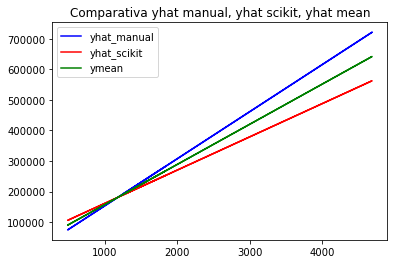

In [88]:
yhat_manual_test_1,yhat_sk_test_1,y_mean_test_1 =predict_models(modelFirst[len(modelFirst.keys())-1],PiesCuadrados_LR_test,np.array(PiesCuadrados_test).reshape(-1,1))
graph_compare_yhat(yhat_manual_test_1,yhat_sk_test_1,y_mean_test_1,df_test["PiesCuadradosPisoUno"])

## **Graficar errores comparativa Manual vs Scikit**

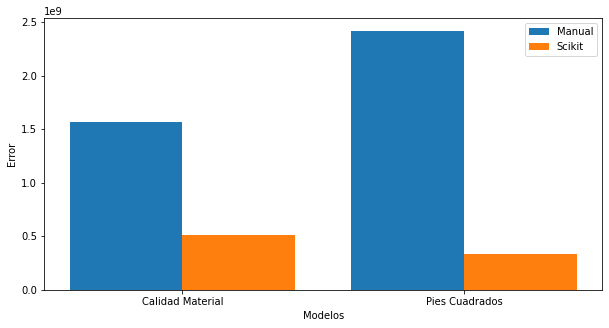

In [402]:
manual_error = [error_calidad_test,error_first_test]
scikit_error = [error_calidad_scikit,error_first_scikit]

index = np.arange(2)
plt.figure(figsize=(10,5)) #tamaño figura
width=0.4 #ancho de barra

#plot
plt.bar(index,manual_error,width,label="Manual")
plt.bar(index+width,scikit_error,width,label="Scikit")
plt.xlabel("Modelos")
plt.ylabel("Error")
plt.legend()
plt.xticks(index+width/2,("Calidad Material","Pies Cuadrados"))
plt.show()



## Conclusión ##

De acuerdo a lo mostrado en la última gráfica, el modelo validado con el segmento de Test contiene un error mucho menor al modelo entrenado manualmente.

Por lo anterior se considera que el modelo de regresión lineal de Scikit Learn debería ser el modelo a utilizar para realizar regresiones lineales.